# CS4168 Project
## Spotify Data Mining
* Cathal Crowe - 21320128
* Robert Flanagan - 21311625
* Mohd Humayun - 21332207
* Steven Lavelle - 21316945
* Oluwadara Fatoki - 21234639

# Importing Modules and Dataset

In [250]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv("tracks.csv")

# Exploratory Data Analysis (EDA)

In [251]:
df.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [252]:
df.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


In [253]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


<Axes: >

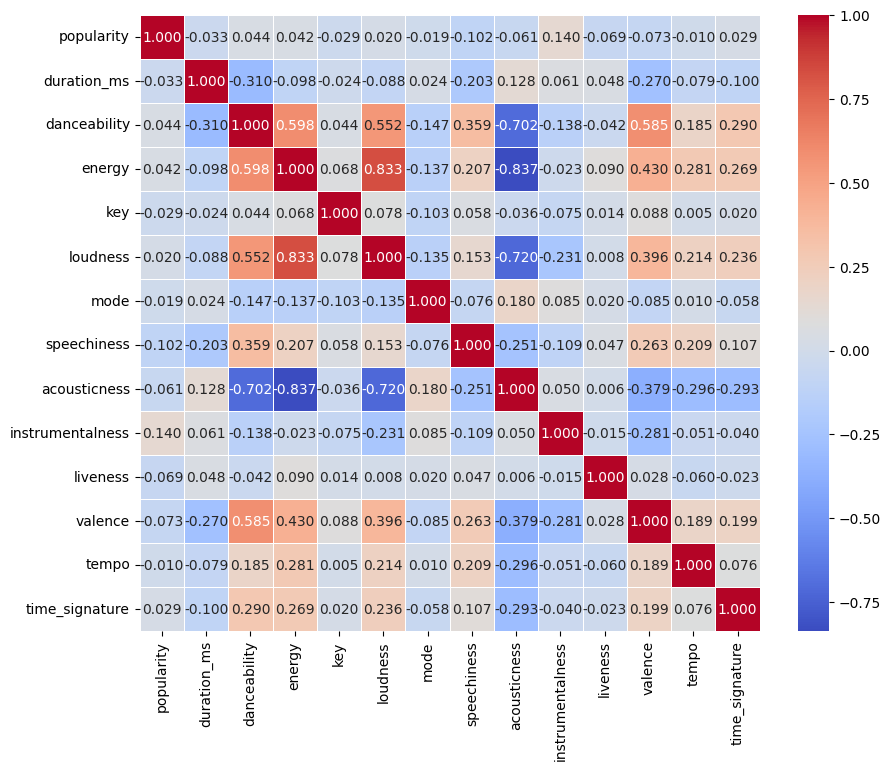

In [254]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

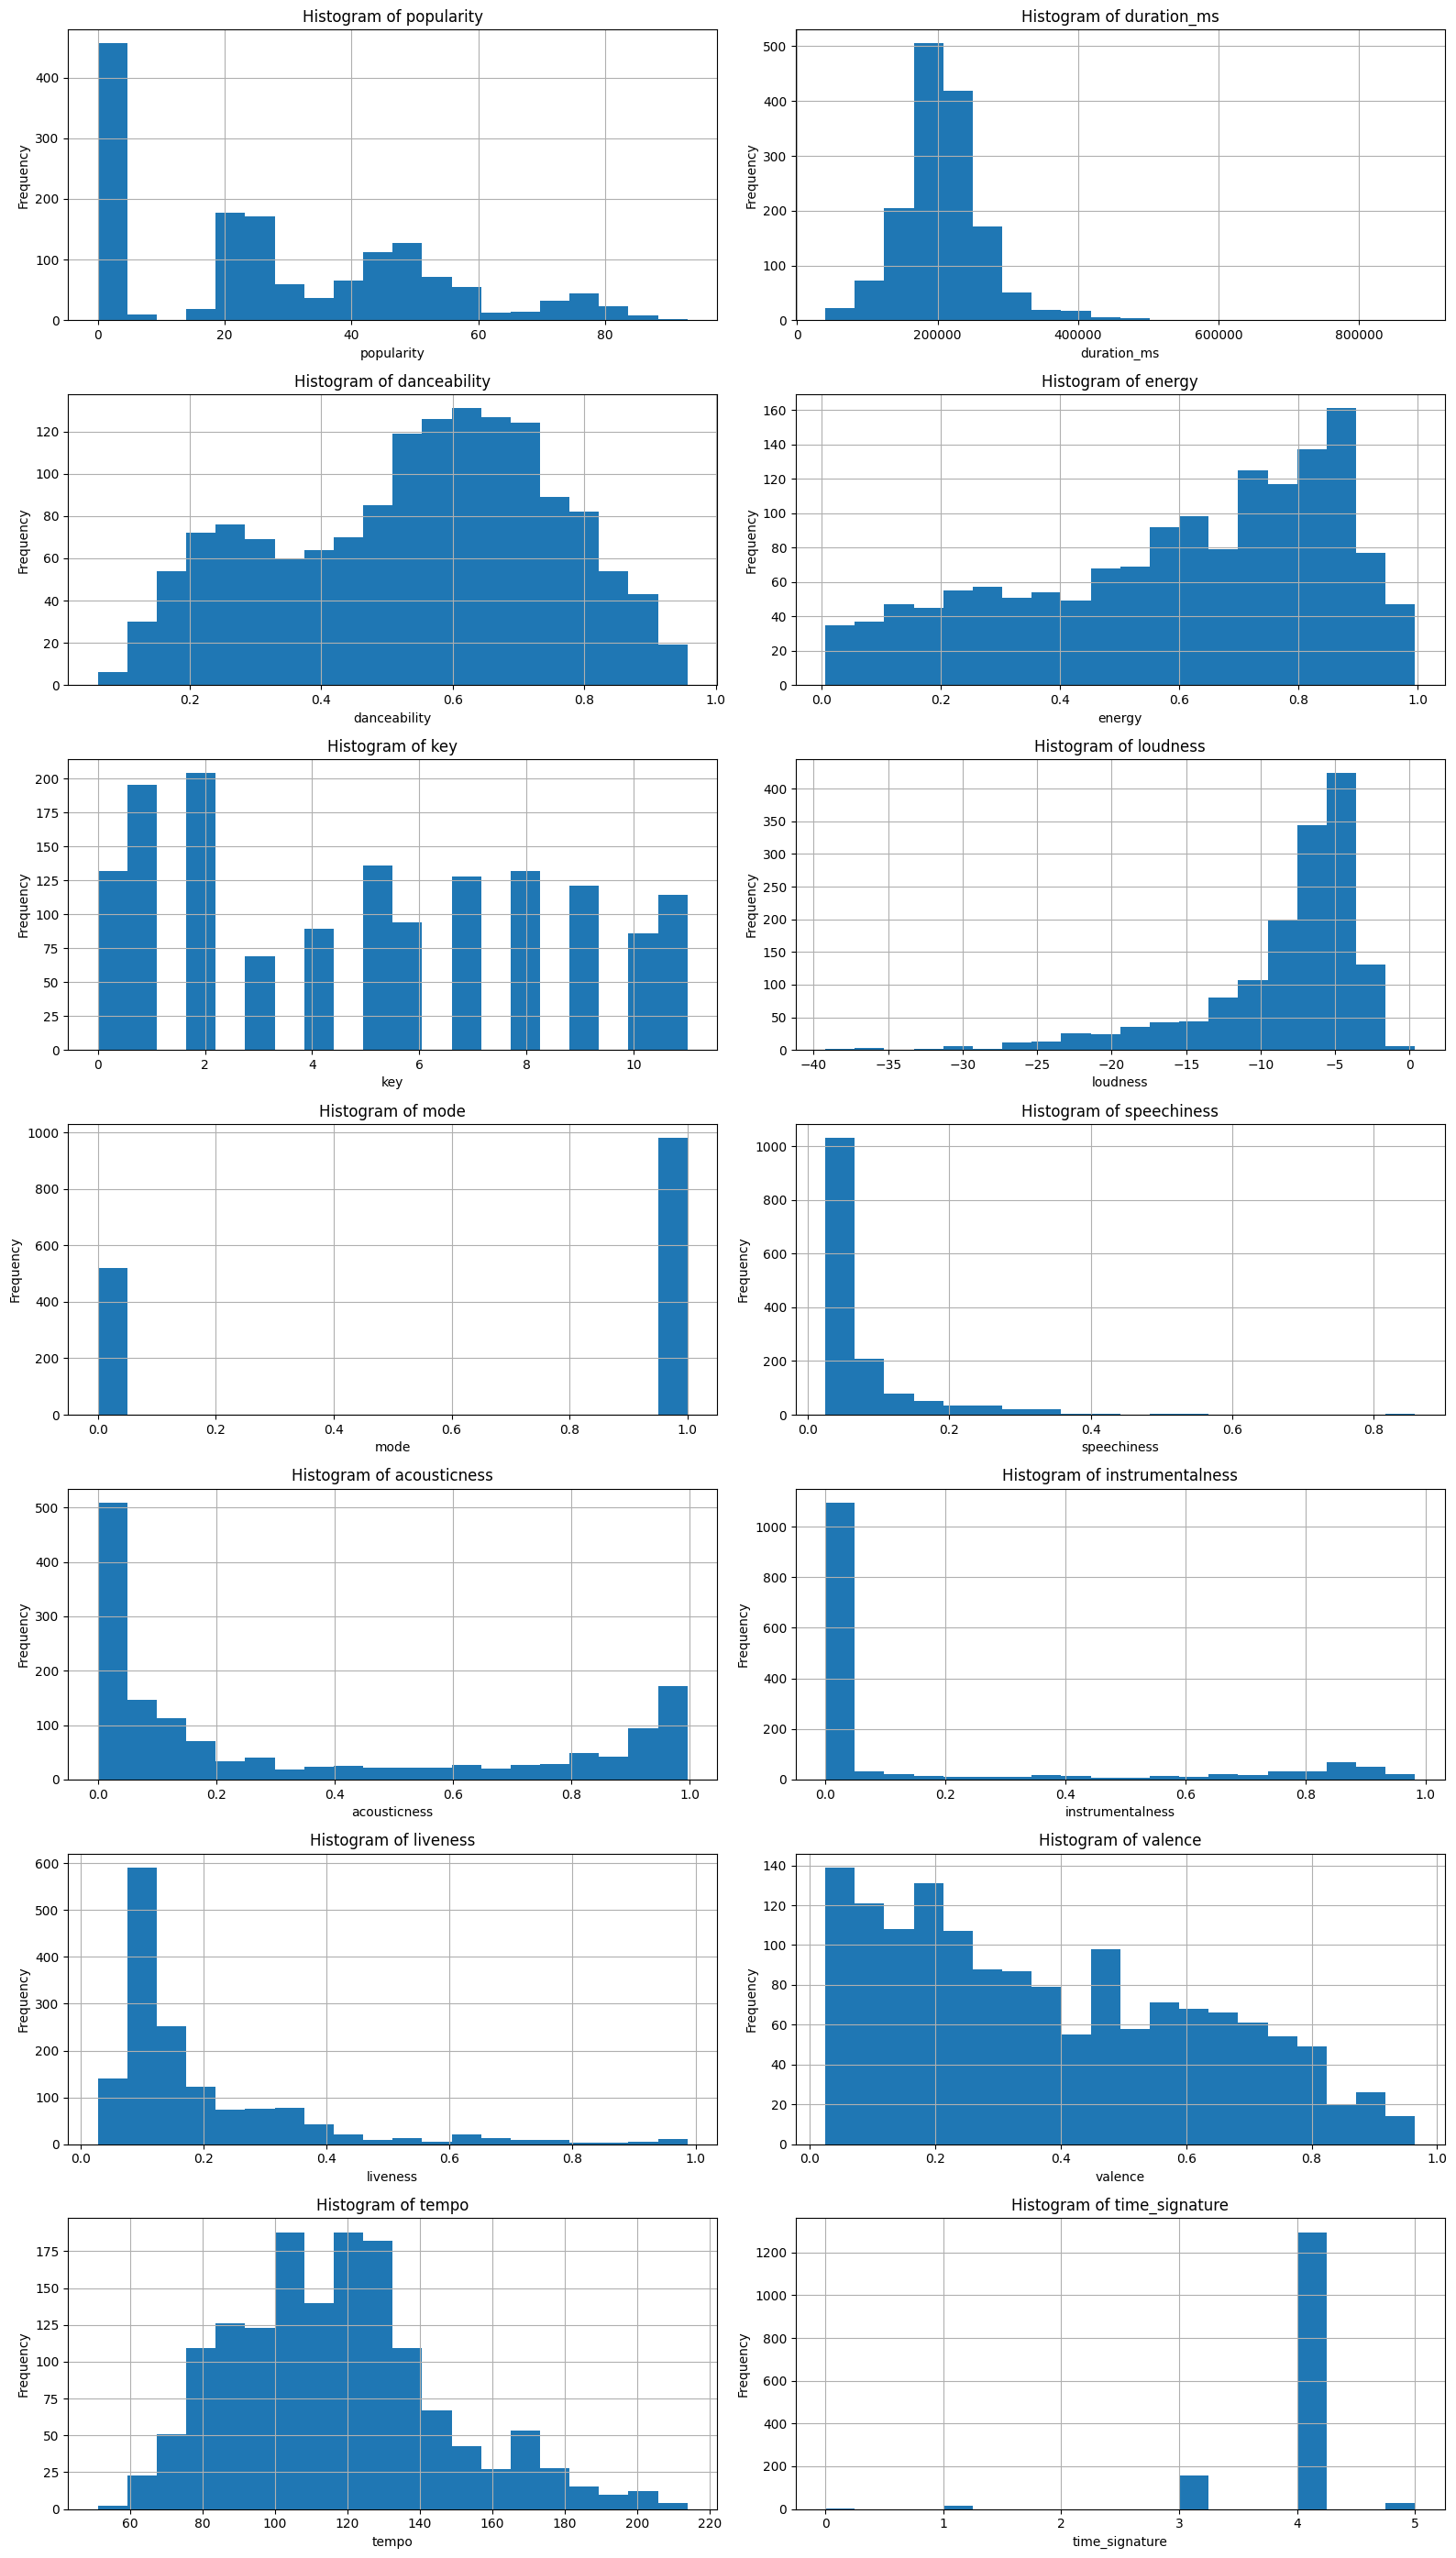

In [255]:

# List of features to plot
features = [
    "popularity", "duration_ms", "danceability", "energy", "key", "loudness",
    "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "time_signature"
]

# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()

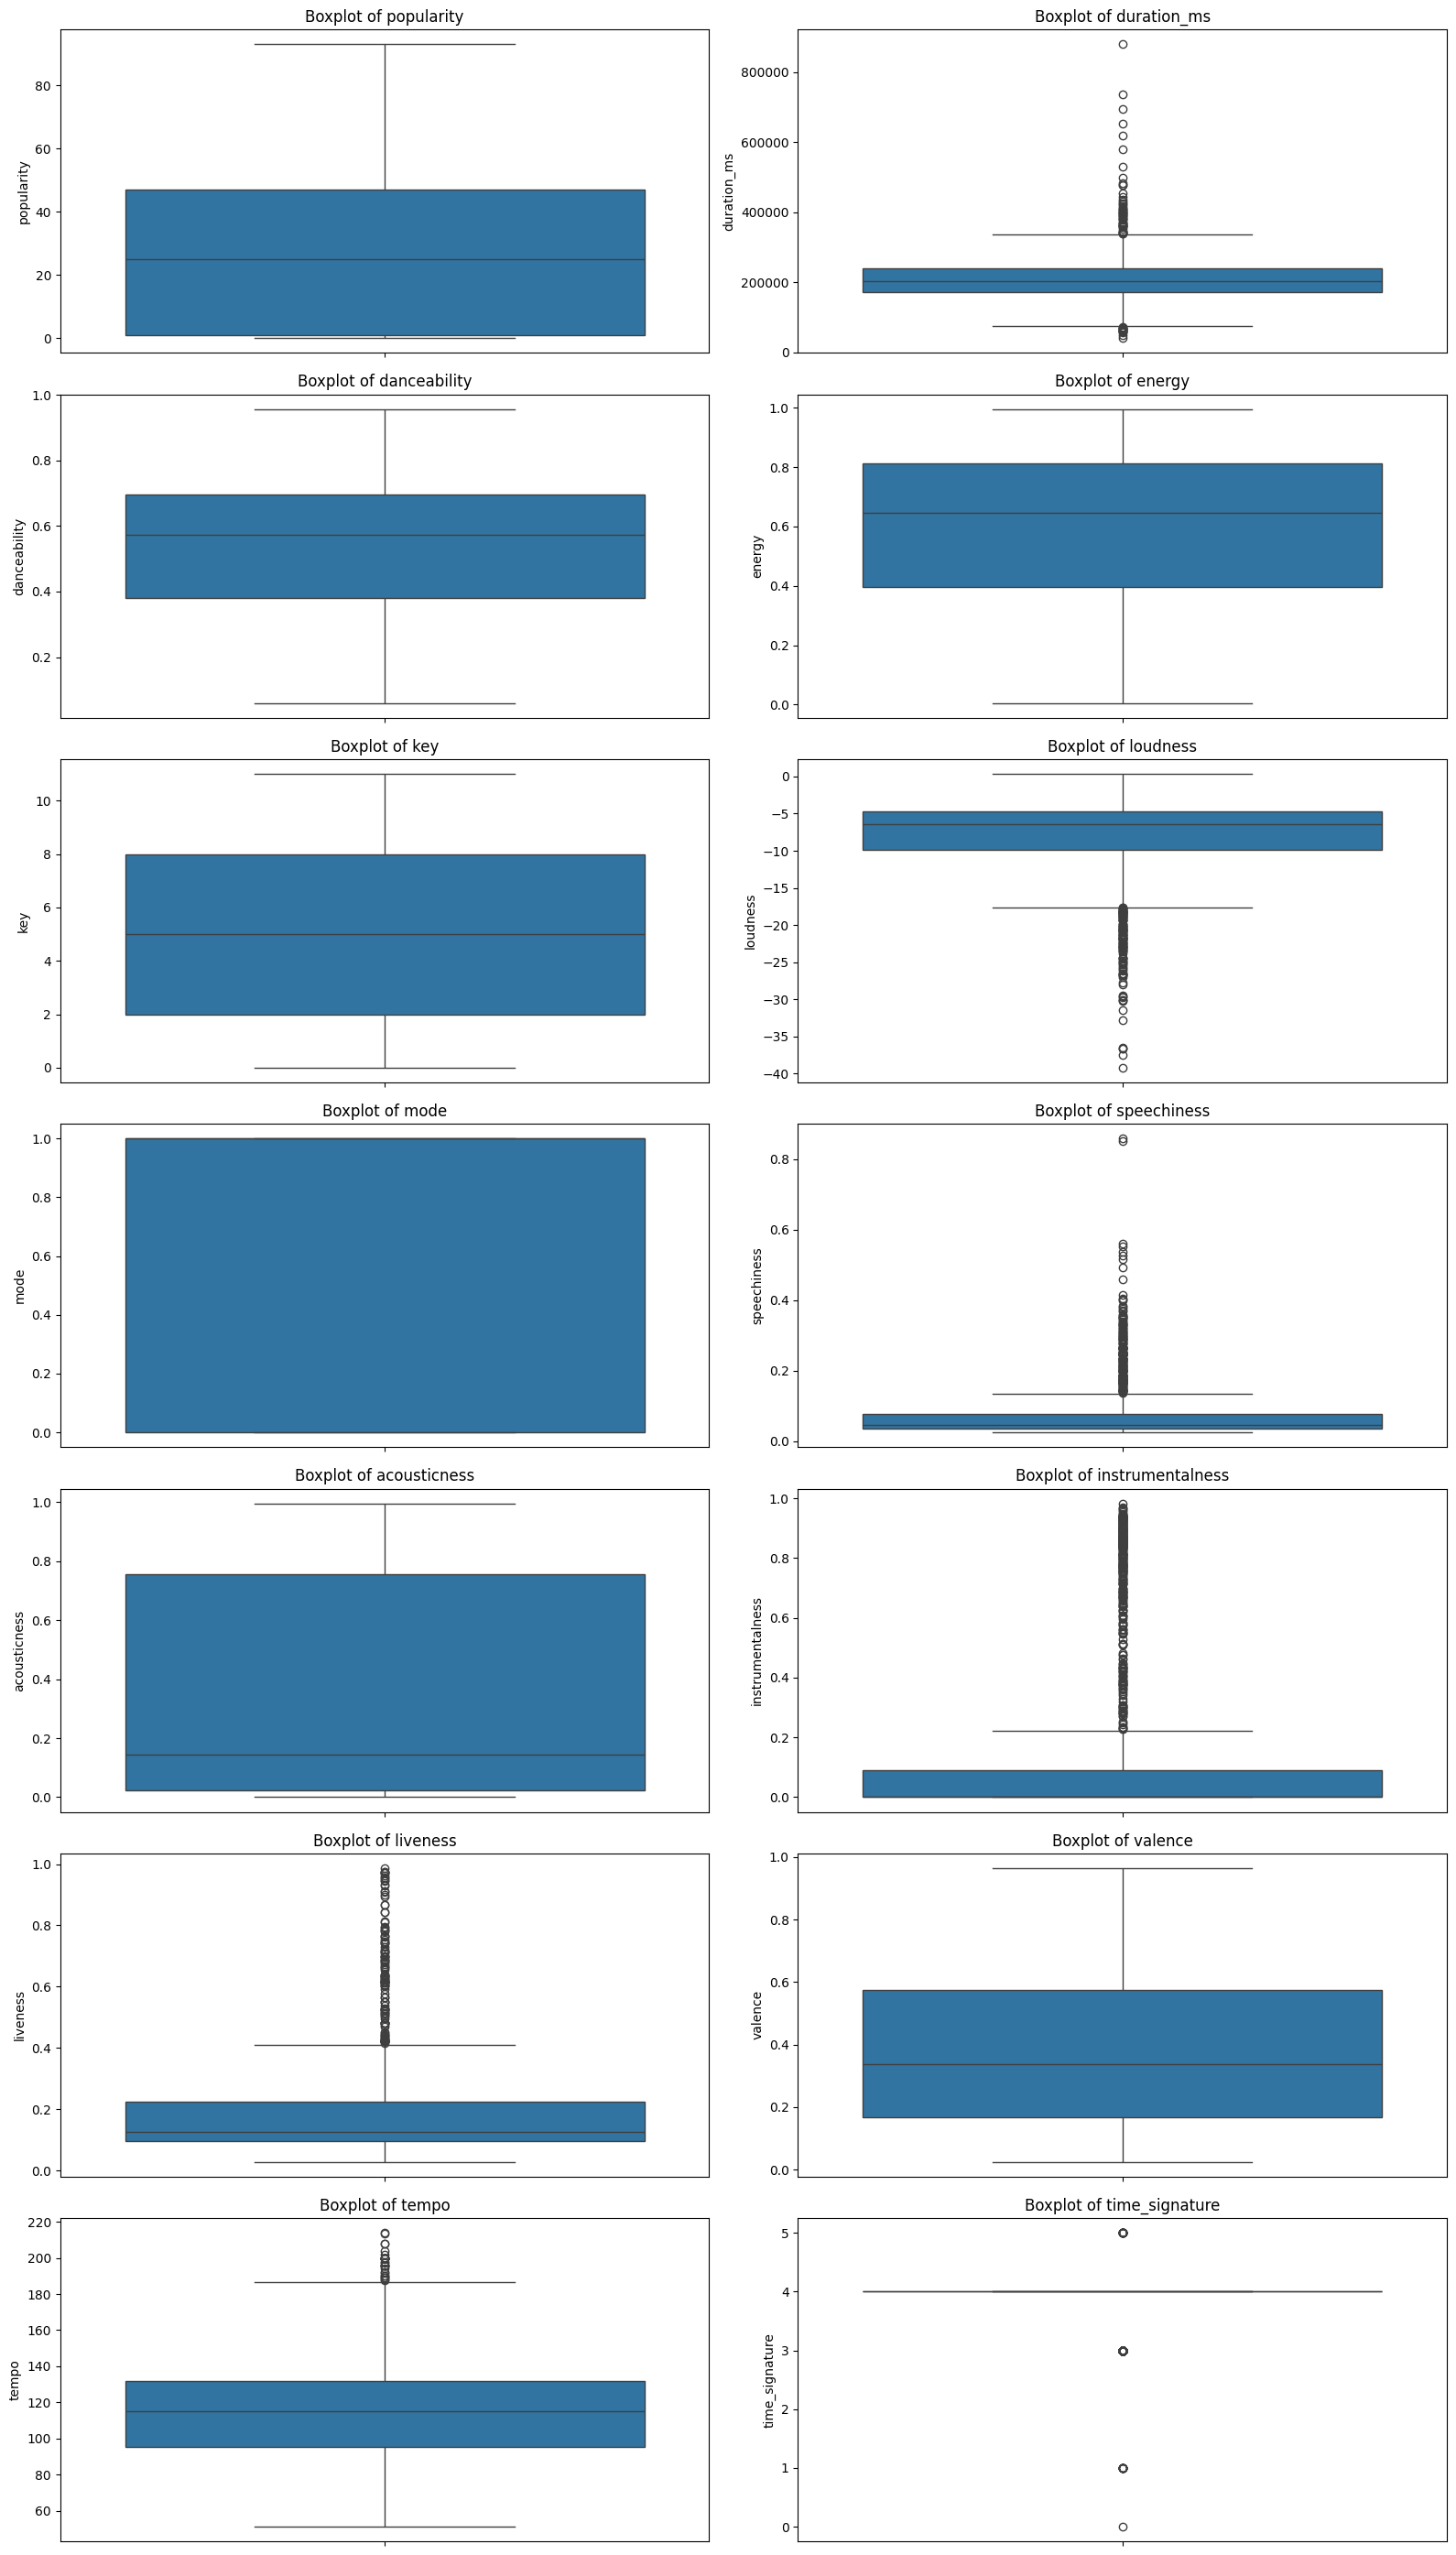

In [256]:
# Calculate the number of rows needed for 2 columns per row
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size
fig = plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(f"Boxplot of {feature}")
    ax.set_xlabel('')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

In [257]:
df['track_genre'].value_counts()

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

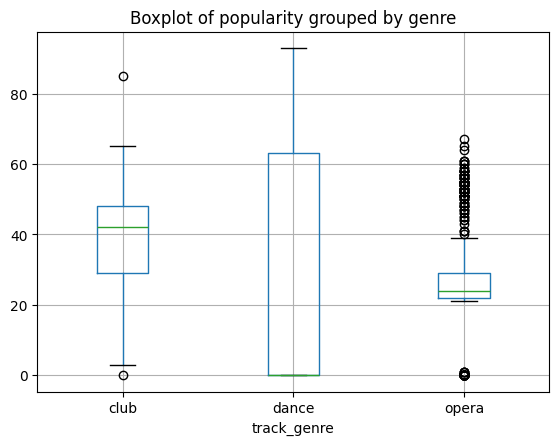

In [258]:
df.boxplot(column='popularity', by='track_genre')
plt.title('Boxplot of popularity grouped by genre')
plt.suptitle("")
plt.show()

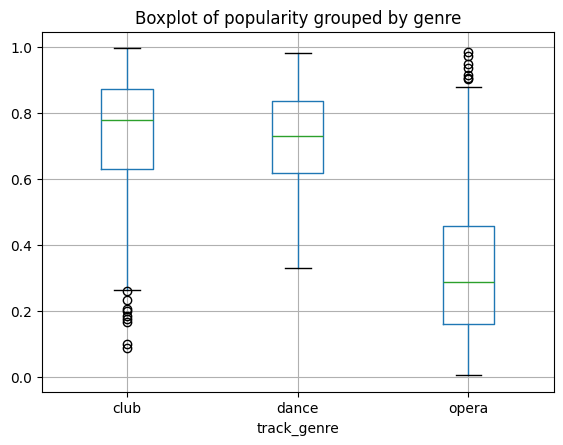

In [259]:
df.boxplot(column='energy', by='track_genre')
plt.title('Boxplot of popularity grouped by genre')
plt.suptitle("")
plt.show()

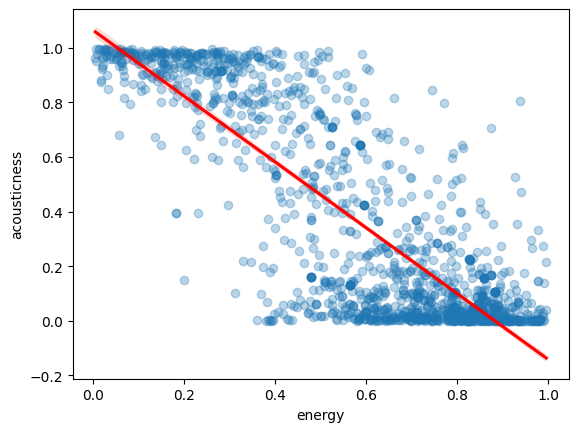

In [260]:
sns.regplot(data=df, x='energy', y='acousticness', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()

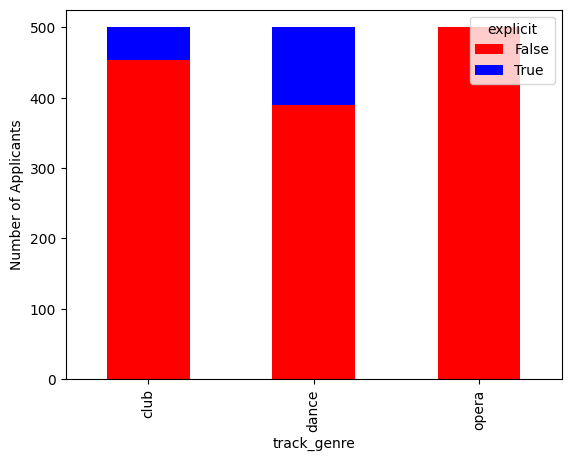

In [261]:
crosstab_CGL = pd.crosstab([ df['track_genre']], df['explicit'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

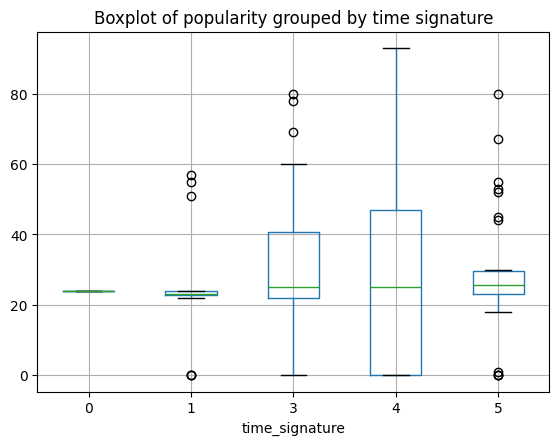

In [262]:
df.boxplot(column='popularity', by='time_signature')
plt.title('Boxplot of popularity grouped by time signature')
plt.suptitle("")
plt.show()

In [263]:
df['time_signature'].value_counts()

time_signature
4    1295
3     158
5      30
1      16
0       1
Name: count, dtype: int64

In [264]:
df['key'].value_counts()

key
2     204
1     195
5     136
0     132
8     132
7     128
9     121
11    114
6      94
4      89
10     86
3      69
Name: count, dtype: int64

In [265]:
df['mode'].value_counts()

mode
1    981
0    519
Name: count, dtype: int64

In [266]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [267]:
df.value_counts('track_genre')

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

# Data preparation

In [268]:
one_hot = pd.get_dummies(df['track_genre'])
df = df.join(one_hot)
df = df.drop(columns=['track_genre'])


In [269]:
print(df.head())


   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          85       202093      True         0.658   0.671    2   -12.210   
1          49       215973     False         0.627   0.505    6   -12.659   
2          65       188160     False         0.807   0.835    9    -6.849   
3          59       233965     False         0.748   0.549    6    -5.447   
4          55       187173     False         0.683   0.869    0    -4.828   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0363       0.09330          0.000927    0.1150    0.166   
1     1       0.0549       0.19700          0.014900    0.0583    0.146   
2     0       0.0631       0.00148          0.527000    0.2330    0.349   
3     0       0.0650       0.00268          0.792000    0.1960    0.197   
4     1       0.0515       0.00088          0.836000    0.2060    0.219   

     tempo  time_signature  club  dance  opera  
0  100.966               4  True  Fal

In [270]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
club                0
dance               0
opera               0
dtype: int64

In [271]:
df['time_signature'] = df['time_signature']/5
df['key'] = df['key']/11

In [272]:
robust_scaler = RobustScaler()
df[['duration_ms', 'loudness', 'tempo', 'popularity']] = robust_scaler.fit_transform(df[['duration_ms', 'loudness', 'tempo', 'popularity']])
print(df.head())

   popularity  duration_ms  explicit  danceability  energy       key  \
0    1.304348    -0.021474      True         0.658   0.671  0.181818   
1    0.521739     0.189467     False         0.627   0.505  0.545455   
2    0.869565    -0.233220     False         0.807   0.835  0.818182   
3    0.739130     0.462899     False         0.748   0.549  0.545455   
4    0.652174    -0.248220     False         0.683   0.869  0.000000   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0 -1.113714     1       0.0363       0.09330          0.000927    0.1150   
1 -1.200658     1       0.0549       0.19700          0.014900    0.0583   
2 -0.075616     0       0.0631       0.00148          0.527000    0.2330   
3  0.195866     0       0.0650       0.00268          0.792000    0.1960   
4  0.315728     1       0.0515       0.00088          0.836000    0.2060   

   valence     tempo  time_signature  club  dance  opera  
0    0.166 -0.383882             0.8  True  False  

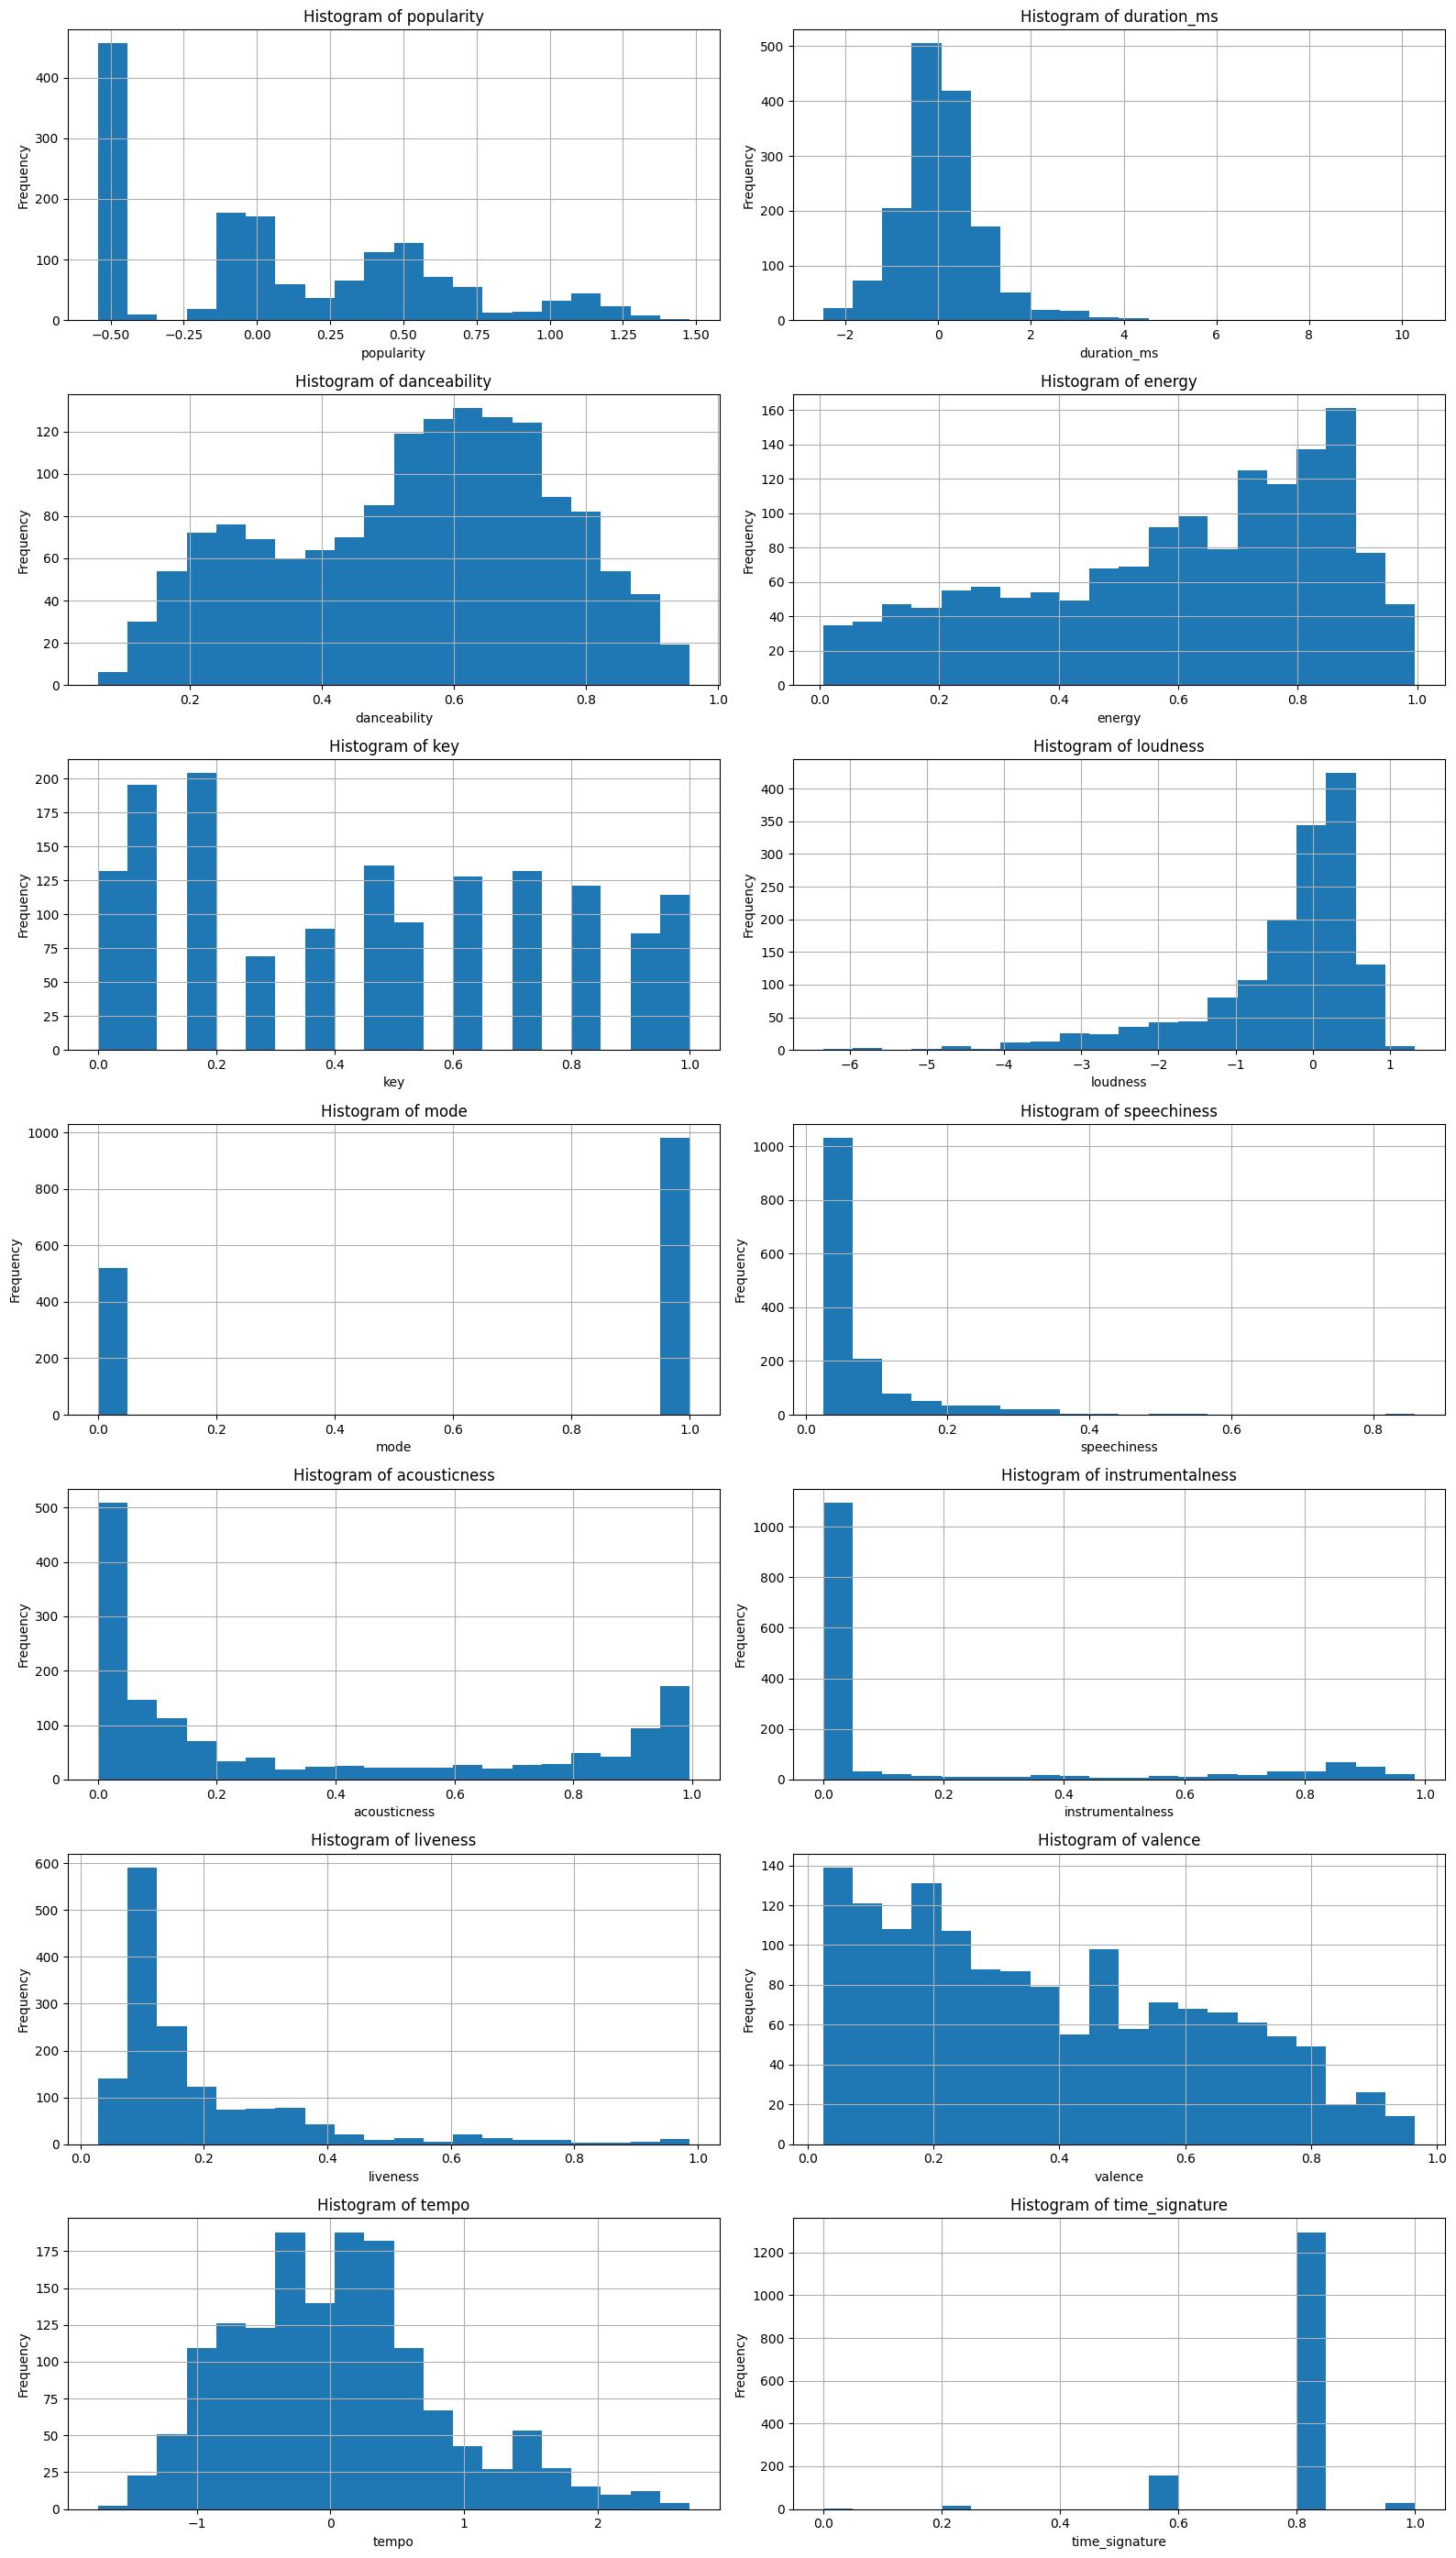

In [273]:
# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()

In [274]:
 # Use a log transformation to decrease the impact of outliers
df['tempo'] = np.log(df['tempo'] + abs(min(df['tempo'])) + 1)
df['liveness'] = np.log(df['liveness'] + abs(min(df['liveness'])) + 1)
df['instrumentalness'] = np.log(df['instrumentalness'] + abs(min(df['instrumentalness'])) + 1)
df['speechiness'] = np.log(df['speechiness'] + abs(min(df['speechiness'])) + 1)
df['acousticness'] = np.log(df['acousticness'] + abs(min(df['acousticness'])) + 1)
df['duration_ms'] = np.log(df['duration_ms'] + abs(min(df['duration_ms'])) + 1)
df['popularity'] = np.log(df['popularity'] + abs(min(df['popularity'])) + 1)
df['loudness'] = np.cbrt(df['loudness'] +  0.01)


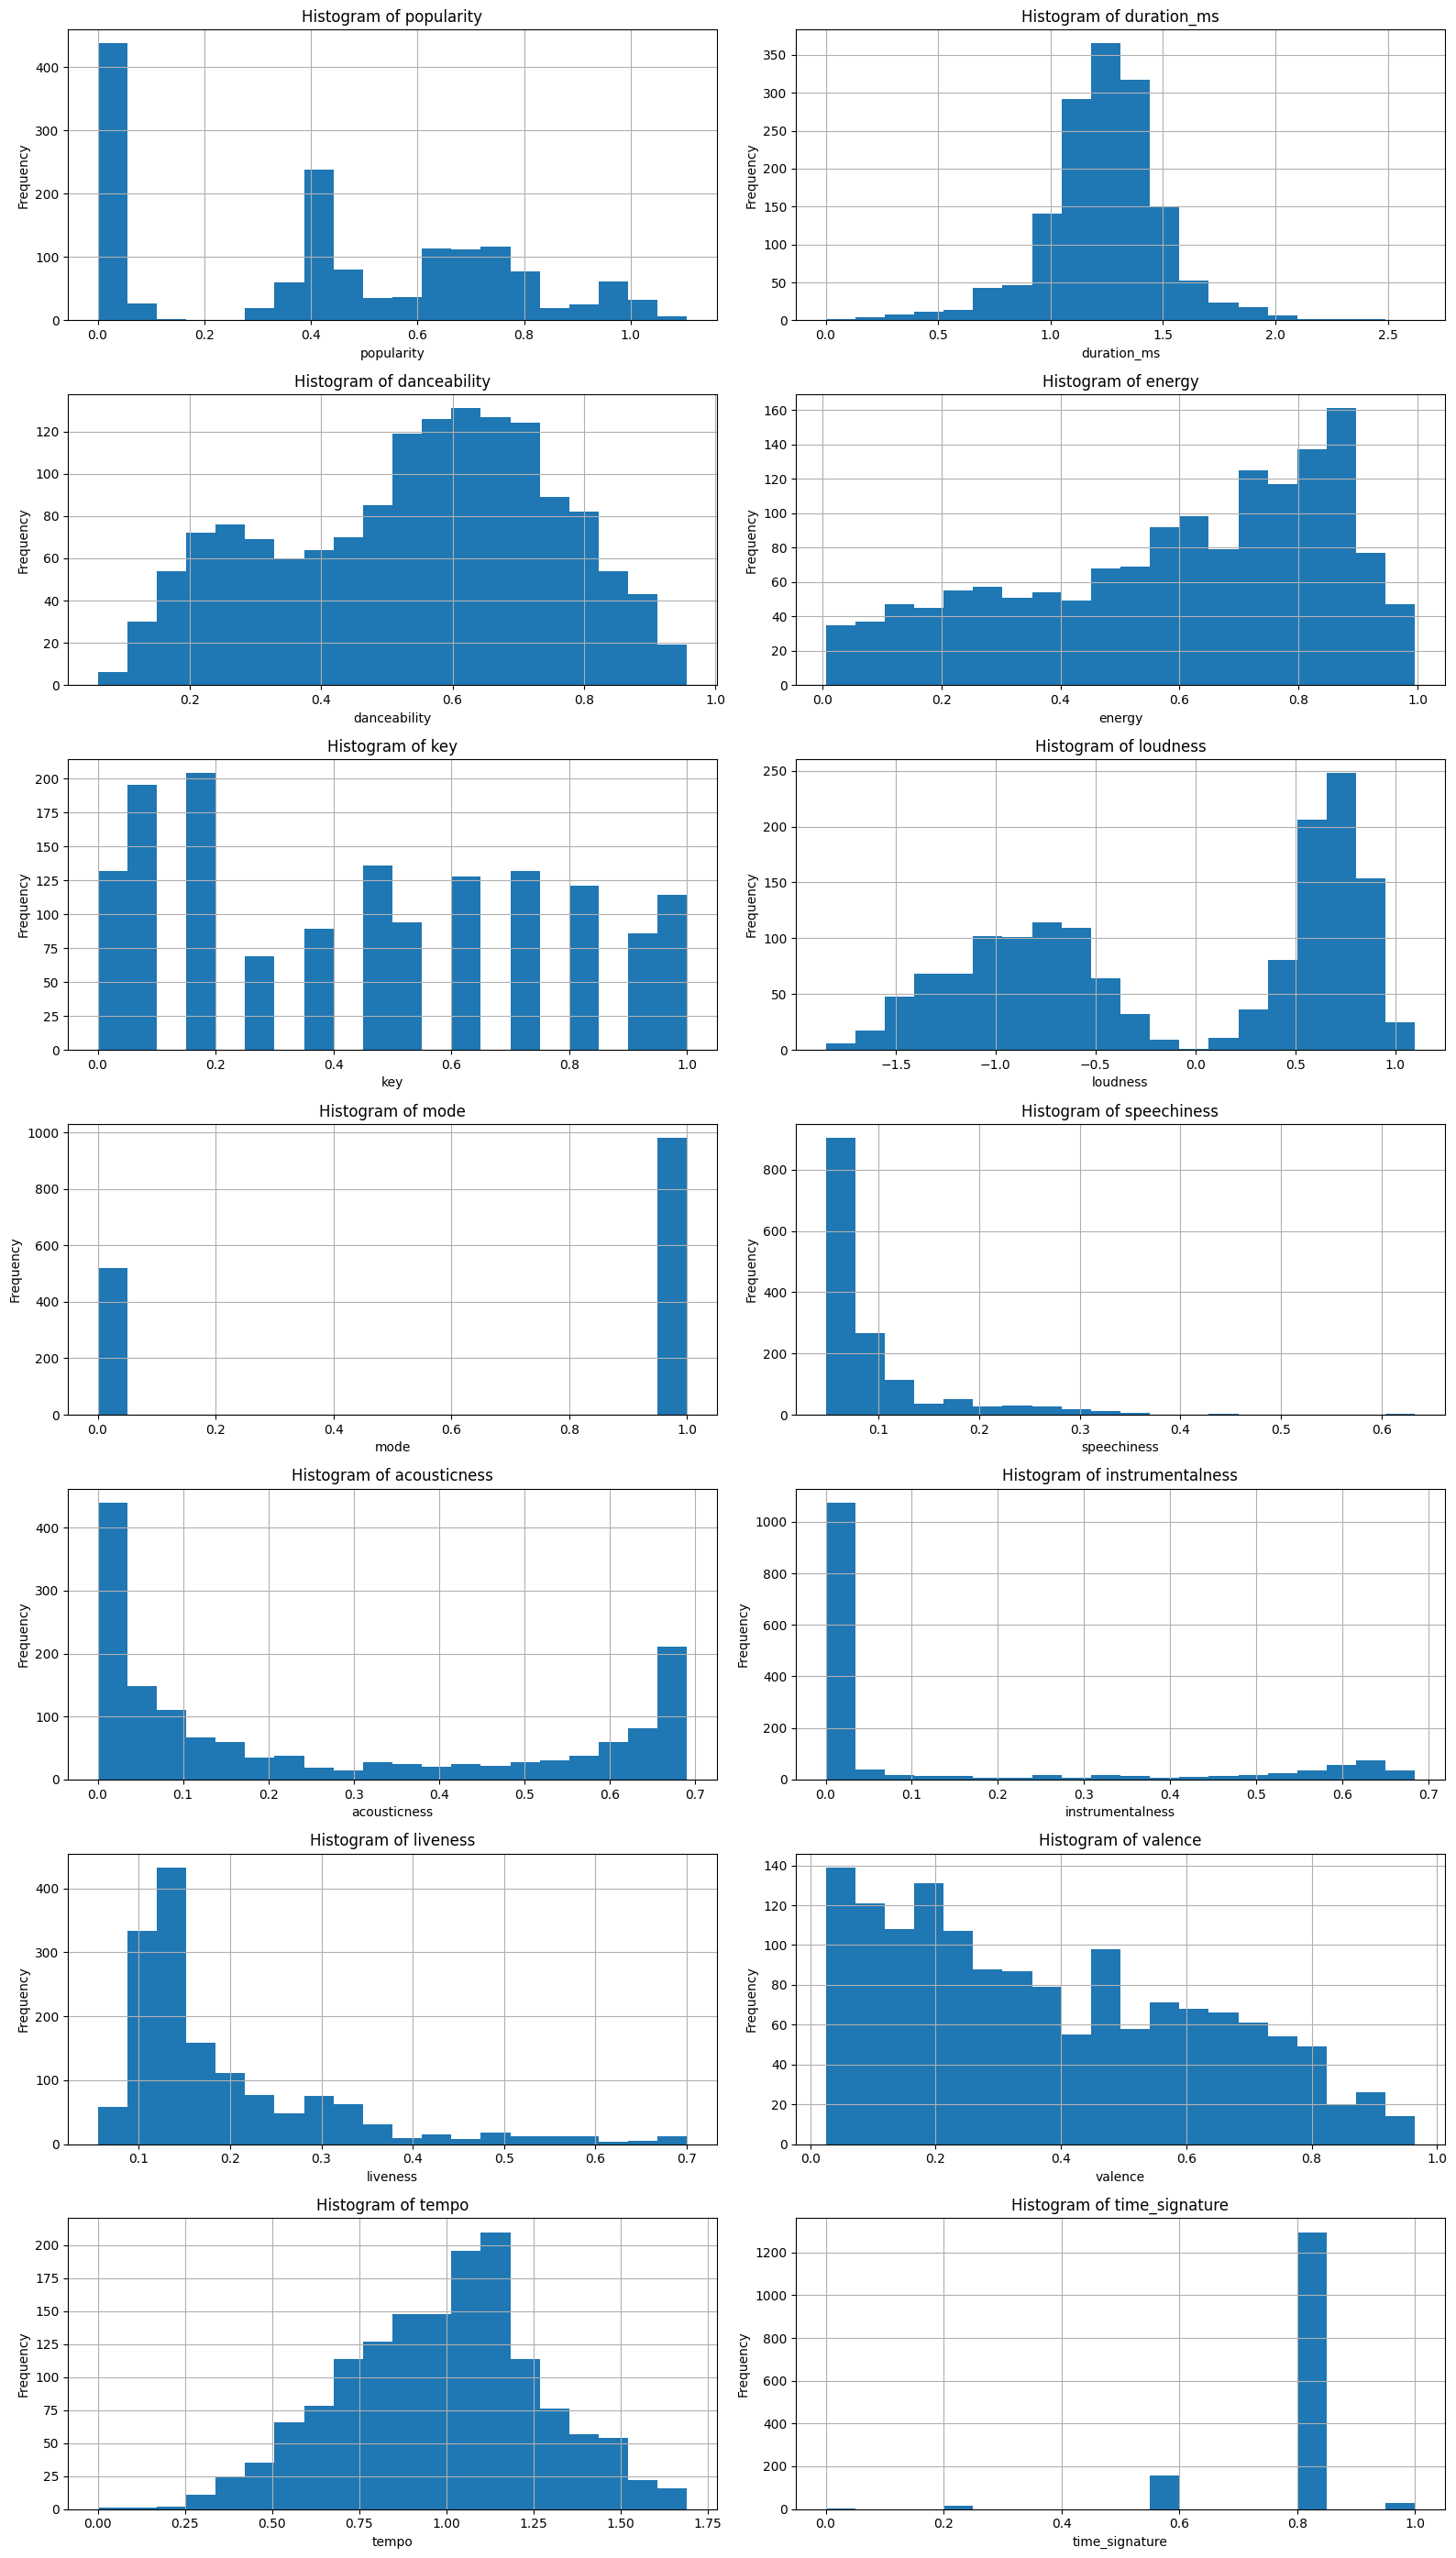

In [275]:
# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()